<a href="https://colab.research.google.com/github/jacksonsin/machine_learning/blob/main/AutoML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Reference:**

https://towardsdatascience.com/a-python-tool-for-data-processing-analysis-and-ml-automation-in-a-few-lines-of-code-da04b3ba904f

In [1]:
!pip install dabl

     |████████████████████████████████| 558 kB 19.1 MB/s 


**Titanic Dataset**

In [8]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Data Pre-processing**

In [6]:
import dabl

In [9]:
df_clean = dabl.clean(df, verbose=1)

Detected feature types:
continuous      2
dirty_float     0
low_card_int    2
categorical     4
date            0
free_string     3
useless         1
dtype: int64


In [13]:
db_types = dabl.detect_types(df_clean)
db_types

,continuous,dirty_float,low_card_int,categorical,date,free_string,useless
Survived,False,False,False,True,False,False,False
Pclass,False,False,False,True,False,False,False
Name,False,False,False,False,False,True,False
Sex,False,False,False,True,False,False,False
Age,True,False,False,False,False,False,False
SibSp,False,False,True,False,False,False,False
Parch,False,False,True,False,False,False,False
Ticket,False,False,False,False,False,True,False
Fare,True,False,False,False,False,False,False
Cabin,False,False,False,False,False,True,False


**Exploratory Data Analysis**

Target looks like classification
Linear Discriminant Analysis training set score: 0.589


[[<Figure size 864x864 with 20 Axes>,
  <Figure size 1152x288 with 4 Axes>,
  <Figure size 432x288 with 1 Axes>],
 None]

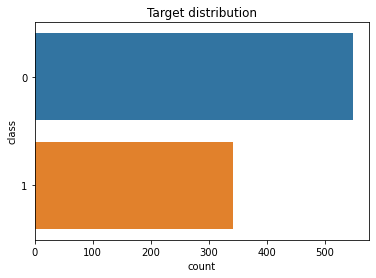

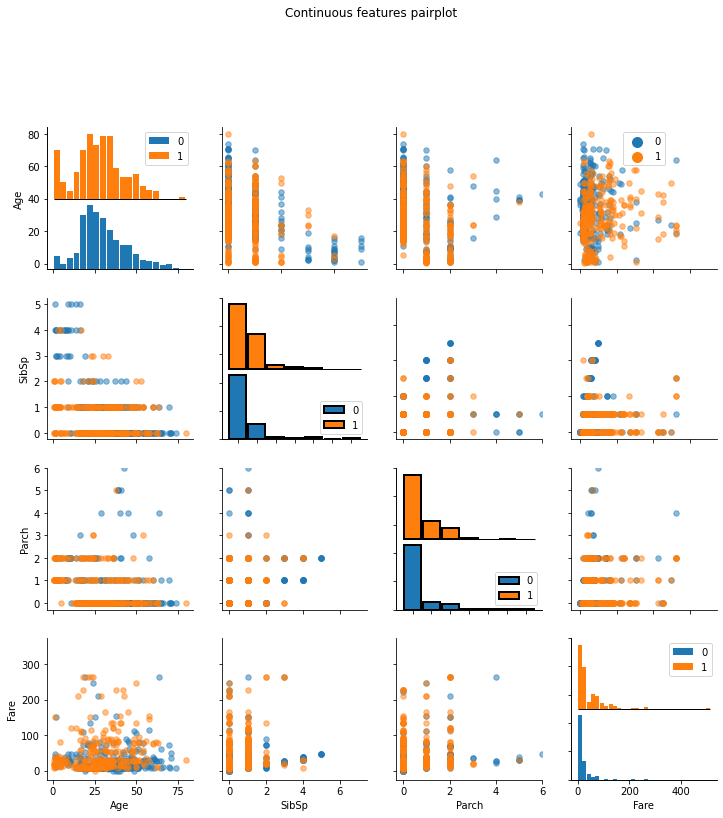

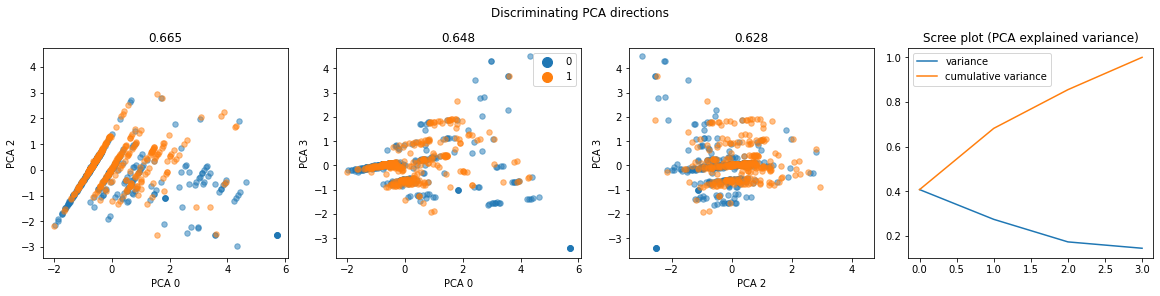

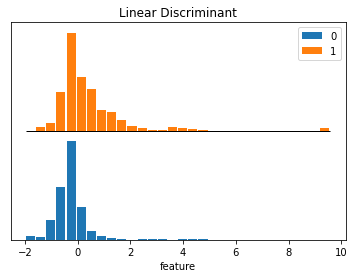

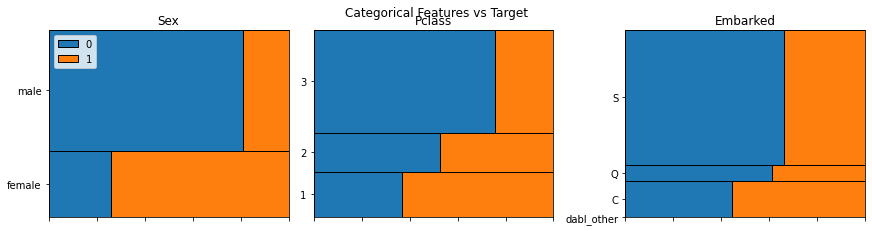

In [14]:
dabl.plot(df_clean, target_col="Survived")

plot() function in dabl can feature visualization by plotting various plots including:

Bar plot for target distribution

Scatter Pair plots

Linear Discriminant Analysis

**Initial Model Building**

In [50]:
survivor_classifier = dabl.SimpleClassifier(random_state=42).fit(df_clean, target_col="Survived")

Running DummyClassifier()
accuracy: 0.616 average_precision: 0.384 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.381
=== new best DummyClassifier() (using recall_macro):
accuracy: 0.616 average_precision: 0.384 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.381

Running GaussianNB()
accuracy: 0.418 average_precision: 0.724 roc_auc: 0.819 recall_macro: 0.523 f1_macro: 0.344
=== new best GaussianNB() (using recall_macro):
accuracy: 0.418 average_precision: 0.724 roc_auc: 0.819 recall_macro: 0.523 f1_macro: 0.344

Running MultinomialNB()
accuracy: 0.771 average_precision: 0.800 roc_auc: 0.837 recall_macro: 0.746 f1_macro: 0.751
=== new best MultinomialNB() (using recall_macro):
accuracy: 0.771 average_precision: 0.800 roc_auc: 0.837 recall_macro: 0.746 f1_macro: 0.751

Running DecisionTreeClassifier(class_weight='balanced', max_depth=1)
accuracy: 0.787 average_precision: 0.628 roc_auc: 0.767 recall_macro: 0.767 f1_macro: 0.770
=== new best DecisionTreeClassifier(class_weight='balanced', 